<a href="https://colab.research.google.com/github/HanSong19/PALS0039-Introduction-to-Deep-Learning-for-Speech-and-Language-Processing-/blob/main/PALS0039_Ex_4_1_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

# Exercise 4.1 Sentiment Analysis from text

In this exercise we implement a DNN system for [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) of movie reviews.

We use a set of film reviews taken from the [Internet Movie Database](https://www.imdb.com/) which have been labelled as positive or negative. Words in the reviews have already been tokenised and encoded as numbers using a dictionary. We load the numeric sequences as variable length lists then build a bag of words model for each review. This gives a fixed length vector for each review which we can input into a DNN classifier.

---
(a) Run the following code block which loads the pre-prepared dataset from the Keras package. Examine the Keras documentation for the [`load_data` method](https://keras.io/api/datasets/imdb/) and add a comment to explain the arguments used (including the defaults for `skip_top`, `start_char`, `oov_char`).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb

#(a)
# num_words=10000 -- the vocabulary size for the input data (top most frequent terms)
# skip_top=0 -- so we don't skip any of the most frequent terms
# start_char=1 -- all sentences will start with this special symbol
# oov_char=2 -- since we limited the size of the vocabulary, any terms excluded will be represented with 2. this is likely to be default 2
#https://keras.io/api/datasets/imdb/
(Xtrain_seq, ytrain), (Xtest_seq, ytest) = imdb.load_data(num_words=10000, index_from=3)
# the most frequent one will be coded as 3

# Print out a sample (first few inputs and associated outputs) of the data
print("SAMPLE OF THE DATA:")
print("-------------------")
print("INPUTS:")
print(Xtrain_seq[:3])
print("OUTPUTS:")
print(ytrain[:3])



SAMPLE OF THE DATA:
-------------------
INPUTS:
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list

---
(b) Examine the sample inputs and outputs above. What do the rows of the inputs represent, what do the numbers in the input represent? What do the numbers in the output represent. Why do all the inputs start with the number 1?


In [ ]:
#(b)
# - Sequences of the top 10000 terms in the corpus, each row is a document (i.e. a single movie review)
# - Output values are 0 for negative and 1 for positive
# - Each document starts with the special symbol "1" (according to the documentation for `imdb.load_data`)

(c) How many out-of-vocabulary (OOV) terms occur in each of the first three documents examined above? Write a short piece of code to determine the lengths and number of OOVs in each:

In [13]:
#(c)
for document in Xtrain_seq[:3]:
  print("Length:", len(document), "OOVs:", document.count(2), sep="\t")


Length:	218	OOVs:	6
Length:	189	OOVs:	7
Length:	141	OOVs:	2


(d) Determine the highest term index occuring in our dataset?

In [14]:
#(d)
highest_index_per_document = []
for document in Xtrain_seq:
  highest_index_per_document.append(max(document))
highest_term_index = max(highest_index_per_document)
print("Highest index in the dataset:", highest_term_index)

Highest index in the dataset: 9999


---
The following code retrieves the mapping terms -> indices (starting from 1) from the corpus and uses this to create an inverse mapping (indices -> terms) taking care to include the special symbols we have introduced with `load_data`.

In [15]:
term_to_index = imdb.get_word_index()

index_to_term = {0: "PAD", 1: "START", 2: "OOV"}
for term, index in term_to_index.items():
  index_to_term[index + 2] = term

# Print out the mappings to the special symbols and the top 10 most frequent words therafter
for i in range(13):
  print(i, index_to_term[i], sep="\t")


1641221/1641221 [==============================] - 0s 0us/step
0	PAD
1	START
2	OOV
3	the
4	and
5	a
6	of
7	to
8	is
9	br
10	in
11	it
12	i


---
(e) Use the index -> term mapping created above to convert the first document to a human-readable version

In [16]:
#(e)
first_document = Xtrain_seq[0]
for term_index in first_document:
  term = index_to_term[term_index]
  print(term, end=" ")

START that on as about parts admit ready speaking really care boot see holy and again who each a are any about brought life what power OOV br they sound everything a though and part life look OOV fan recommend like and part elegant successful for feeling from this based and take what as of those core movie that on and manage airplane 4 and on me because i as about parts from been was this military and on for kill for i as cinematography with OOV a which let i is left is two a and seat raises as sound see worried by and still i as from running a are off good who scene some are church by of on i come he bad more a that gives as into OOV is and films best commenting was each and OOV to rid a beyond who me about parts final his keep special has to and OOV manages this characters how and perhaps was american too at references no his something of enough russ with and bit on film say final his sound a back one jews with good who he there's made are characters and bit really as from harry how 

---
We now vectorise the review documents. Run the code.

In [17]:
# Function to convert a list of documents into counts of term indices.
# Each row represents a single document and each column represents the counts of each term in the document.
def bags_of_words(documents, numterms=10000):
  # We create an empty array of the right size before we begin:
  document_term_counts = np.zeros((len(documents), numterms))  
  # Now we loop over all documents and terms and count them:
  for document_index, document in enumerate(documents):
    for term_index in document:
      document_term_counts[document_index, term_index] += 1
  return document_term_counts

# Convert training and test data to fixed-length vectors
Xtrain = bags_of_words(Xtrain_seq)
Xtest = bags_of_words(Xtest_seq)

# Convert labels to numpy array
ytrain = np.array(ytrain)
ytest = np.array(ytest)

# Print out some of the data to see what it looks like
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)
print(Xtrain[:10])

(25000, 10000) (25000,) (25000, 10000) (25000,)
[[ 0.  1.  6. ...  0.  0.  0.]
 [ 0.  1.  7. ...  0.  0.  0.]
 [ 0.  1.  2. ...  0.  0.  0.]
 ...
 [ 0.  1. 37. ...  0.  0.  0.]
 [ 0.  1.  5. ...  0.  0.  0.]
 [ 0.  1.  2. ...  0.  0.  0.]]


---
Build the DNN model. Run the code and add comments.

In [19]:
def build_model(input_width=10000, hidden_width=16, output_width=1, add_hidden_layers=1, hidden_layer_activation="sigmoid"):
  model = Sequential()
  #Sequential is one of the most common neural network
  model.add(Dense(hidden_width, activation=hidden_layer_activation, input_shape=(input_width,)))
  for i in range(add_hidden_layers):
    #Dense means all inputs are connected
    model.add(Dense(hidden_width, activation=hidden_layer_activation))
  model.add(Dense(output_width, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
  #binary_crossentropy is used when there are 2 input and output is one.
  return model

model = build_model()
#build_model(add_hidden_layers = 20) can be done
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                160016    
                                                                 
 dense_29 (Dense)            (None, 16)                272       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


---
(f) Call the `model.fit` method with the correct arguments to train the model with the following specifications: (1) Train for 30 iterations over the dataset; (2) Update the weights during training in batches of 64 samples; (3) Request Keras to randomly select 10% of the training set as the **validation set**.

In [20]:
#(f) trining the model 
training_info = model.fit(Xtrain, ytrain, epochs=30, batch_size=64, validation_split=0.10)
#validation_split can be automatically done in Keras. 0.10 means that 90% of them were used for training and 10% is used for validatiaon
# the results shows that at some point, val_accuracy became 8.89 but after that, it gets lower, suggesting that it probabiliy should have stopped.
# I can plot the result and see where to stop

Epoch 1/30
352/352 [==============================] - 2s 4ms/step - loss: 0.4571 - accuracy: 0.8311 - val_loss: 0.3160 - val_accuracy: 0.8828
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 0.2446 - accuracy: 0.9078 - val_loss: 0.2816 - val_accuracy: 0.8916
Epoch 3/30
352/352 [==============================] - 2s 4ms/step - loss: 0.1957 - accuracy: 0.9279 - val_loss: 0.2688 - val_accuracy: 0.8952
Epoch 4/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1688 - accuracy: 0.9398 - val_loss: 0.2753 - val_accuracy: 0.8996
Epoch 5/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1492 - accuracy: 0.9460 - val_loss: 0.2843 - val_accuracy: 0.8940
Epoch 6/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1368 - accuracy: 0.9516 - val_loss: 0.3009 - val_accuracy: 0.8952
Epoch 7/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1261 - accuracy: 0.9563 - val_loss: 0.3172 - val_accuracy: 0.8896
Epoch 

---
Plot and examine the training graphs, compare the training and evaluation errors. Run the code.

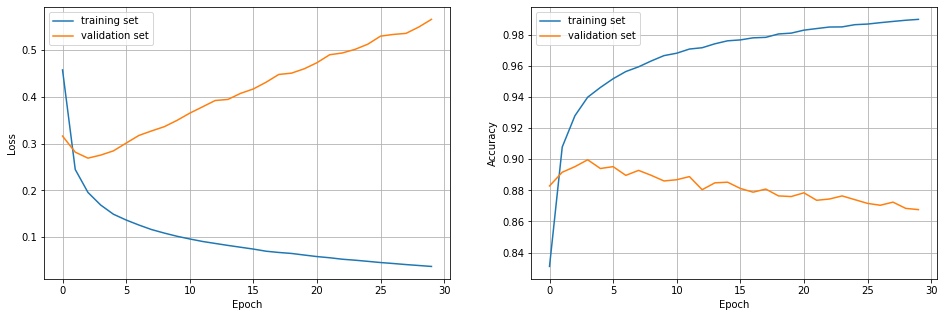

In [21]:
def plot_training_history(training_info):
  # Plot the training process:
  fig, axs = plt.subplots(1, 2, figsize=(16, 5))
  axs[0].plot(training_info.history['loss'], label="training set")
  axs[0].plot(training_info.history['val_loss'], label="validation set")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Loss")
  axs[0].grid(True)
  axs[0].legend()
  try:
    axs[1].plot(training_info.history['accuracy'], label="training set")
    axs[1].plot(training_info.history['val_accuracy'], label="validation set")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    axs[1].grid(True)
    axs[1].legend()
  except:
    pass
  plt.show()

plot_training_history(training_info)
#you should stop when the validation set starts to go down

(g) Does the process exhibit overfitting or underfitting? Is the performance of the classifier good? Is 30 epochs a reasonable choice? Should the number of epochs be increased or decreased?

In [22]:
#(g)
# - Overfitting
# - It is better than random guessing (the validation set should contain approximately 50% of samples with each output)
# - The performance doesn't improve much and the model seems to be overfitting -- it can be decreased (early stopping at around 10 epochs).

The follow applies TF-IDF transform to the term counts and repeats the model training experiment

Epoch 1/30
352/352 [==============================] - 2s 4ms/step - loss: 0.6851 - accuracy: 0.6589 - val_loss: 0.6574 - val_accuracy: 0.7772
Epoch 2/30
352/352 [==============================] - 1s 4ms/step - loss: 0.5947 - accuracy: 0.8325 - val_loss: 0.5152 - val_accuracy: 0.8588
Epoch 3/30
352/352 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.8702 - val_loss: 0.3596 - val_accuracy: 0.8808
Epoch 4/30
352/352 [==============================] - 1s 4ms/step - loss: 0.2961 - accuracy: 0.8940 - val_loss: 0.2910 - val_accuracy: 0.8900
Epoch 5/30
352/352 [==============================] - 2s 4ms/step - loss: 0.2403 - accuracy: 0.9095 - val_loss: 0.2669 - val_accuracy: 0.8928
Epoch 6/30
352/352 [==============================] - 1s 4ms/step - loss: 0.2130 - accuracy: 0.9181 - val_loss: 0.2578 - val_accuracy: 0.8948
Epoch 7/30
352/352 [==============================] - 1s 4ms/step - loss: 0.1957 - accuracy: 0.9256 - val_loss: 0.2538 - val_accuracy: 0.8976
Epoch 

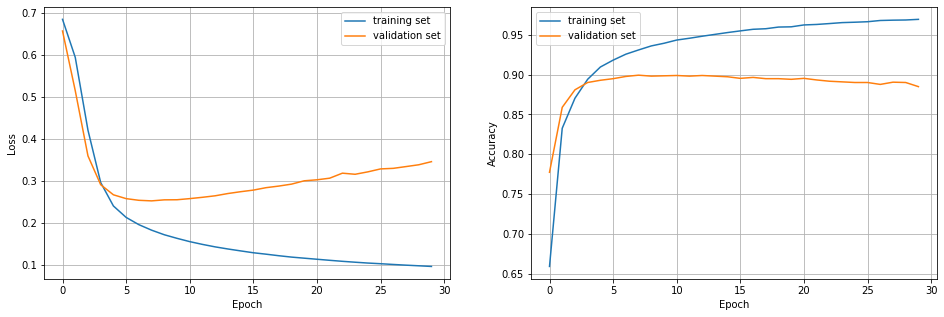

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(Xtrain)
Xtrain_tfidf = tfidf_transformer.transform(Xtrain).toarray()

model_tfidf = build_model()
training_info = model_tfidf.fit(Xtrain_tfidf, ytrain, epochs=30, batch_size=64, validation_split=0.10)
plot_training_history(training_info)

---
(h) Does the TF-IDF transform improve the model performance with current choice of parameters? Can you think of possible reasons?

In [ ]:
#(h)
# Not really, TF-IDF was initially motivated as a way of normalising samples for Information Retrieval tasks;
# In contrast, it is possible that the task of Sentiment Classification should be more sensitive to certain keywords than others and that TF-IDF may have little benefit here.

---
(i) Estimate the generalisation performance of the two models on the test set (use the [`model.evaluate` method](https://keras.io/api/models/model_training_apis/#evaluate-method)). How does the test accuracy compare to those on the validation set? Why?

In [ ]:
#(i)
models_data = {"Initial model": (model, Xtest), "TF-IDF model": (model_tfidf, tfidf_transformer.transform(Xtest).toarray())}
for this_label, (this_model, this_Xtest) in models_data.items():
  test_loss, test_accuracy = this_model.evaluate(this_Xtest, ytest, verbose=0)
  print(this_label,)
  print("Test loss:", test_loss)
  print("Test accuracy:", test_accuracy)
  print("---------------------------------------")

# - The test accuracy is lower, probably because it is completely disjoint from the training set (in terms of movie titles), whereas the randomly selected samples during training are not.
# - Be careful when automatically / randomly selecting validation data from the training set, or better, do it manually with knowledge of the task and dataset.

Initial model
Test loss: 0.643122673034668
Test accuracy: 0.8468000292778015
---------------------------------------
TF-IDF model
Test loss: 0.40631213784217834
Test accuracy: 0.8646000027656555
---------------------------------------


---
(j) Inspect the predictions of the first model on the first 10 documents in the test set (use the model.predict method). Also convert the test documents to human-readable format as before. Do the predictions seem sensible?

In [ ]:
#(j)
print(model.predict(Xtest[:10]))

for document in Xtest_seq[:10]:
  print()
  for term_index in document:
    term = index_to_term[term_index]
    print(term, end=" ")

[[0.00155729]
 [0.99980253]
 [0.99783254]
 [0.99325705]
 [0.9981064 ]
 [0.9987519 ]
 [0.99839604]
 [0.00179178]
 [0.996541  ]
 [0.9997978 ]]

START please give this one a miss br br OOV OOV and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite OOV so all you madison fans give this a miss 
START this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances OOV the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere OOV with sexual tension and psychological OOV it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident her

---
(k) **Optional:** Experiment with the problem to try to improve performance, e.g. by changing the the structure of the network: size, number of layers, optimizer, learning rate, number of epochs.
